# Quantum Computing
****

What is Quantum Computing?
Quantum Computing focuses on the development of computer technologies. It is centered upon Quantum Theory; the behaviour and nature of energy and matter on an atomic and subatomic (quantum) level. Quantum theory gives us a more complete picture of the universe. We can use unexplained behavior to perform certain computations that were previously deemed not possible.

In [18]:
# Generating random numbers.
import numpy as np

# Plotting.
import seaborn as sns

# Random numbers and choices.
import random

# Combinations and permutation.
import itertools

## Probability Tree
If you place a fair coin in the state Tails and then flip it, there is a 50% chance of seeing Tails and a 50% chance of seeing Heads. We can plot this on a probability tree like so:

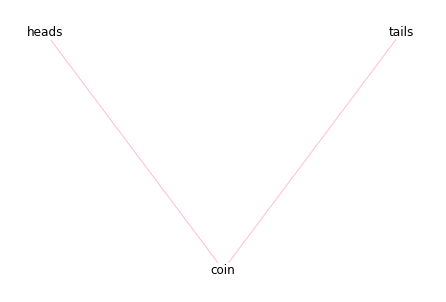

In [19]:
# Import the NetworkX package
import networkx as nx

# Import matplotlib library to visualize the graph in a Jupyter Notebook
import matplotlib.pyplot as plt


# Create a Graph() object and relate it to the variable 'graph_1'
graph_1 = nx.Graph()

graph_1.add_nodes_from(['coin','heads','tails'])

# Add the edges:
graph_1.add_edges_from([('coin', 'heads'), ('coin', 'tails')])

# Use the .draw() function to visualize the graph
nx.draw_spectral(graph_1,with_labels=True, edge_color="pink", node_color="white")


predicting the outcome of chained events leads to 50% chance of getting 'Heads' or 'Tails'
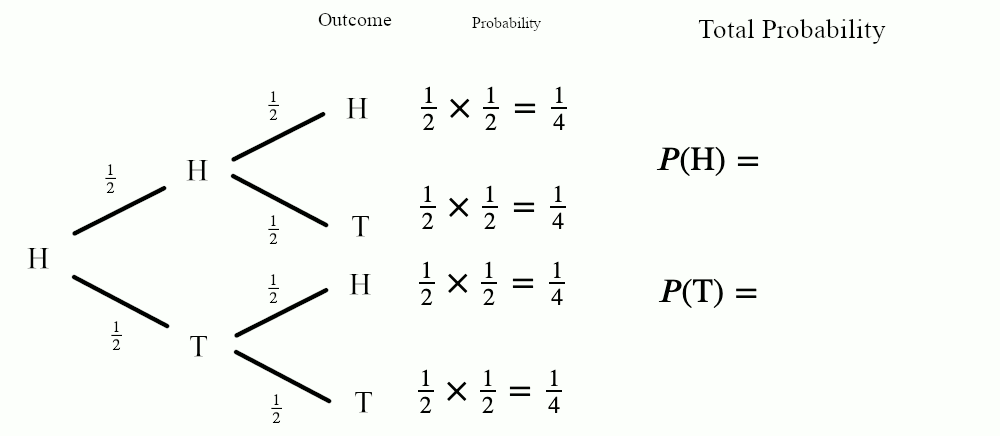

In [20]:
# Simulating flipping one coin 50 times.
np.random.binomial(1, 0.5, 50)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1])

In [21]:
# Flip coin 50  times, Counting total of tails.
np.random.binomial(50, 0.5)

27

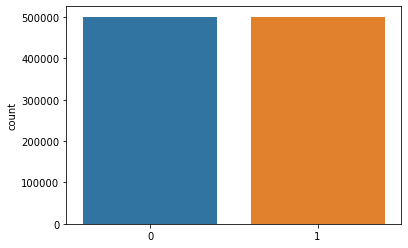

In [22]:
# Plot result. Expected result: roughly 50/50.
sns.countplot(x=np.random.binomial(1, 0.5, 1000000));

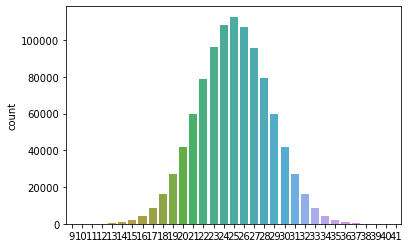

In [23]:
# Outcomes of flipping fifty coins.
sns.countplot(x=np.random.binomial(50, 0.5, 1000000));

## Qubits
To measure probabilities, Quantum Computing uses a Qubit, which is a quantam variant of a bit. Qubit's use 0 and 1 as states and can store a single binary piece of information. They can be manipulated with quantum mechanics to give new gates, allowing new ways to design algorithms.
$\lVert x \rVert$

Unlike classical bits, Qubits are not restricted to it's state. The state of a Qubit is more complex than a binary value. Getting a 0 or 1 from a Qubit only needs to be well-defined when measurements are made to extract an output.<br>
Representing Qubits with a mutually exclusive state of 0 or 1 can be done using <i> orthogonal vectors. </i> :
<br>
<font color="salmon">
<b>state 0: </b>
$|0\rangle = $ 
$\begin {bmatrix} 1 \\ 0\end{bmatrix}$
</font>
<br>
<br>
<font color="MediumVioletRed">
<b>state 1:</b>
$|1\rangle = $ 
$\begin {bmatrix} 0 \\ 1\end{bmatrix}$
</font>
<br>
These two states ($|0\rangle$  & $|1\rangle$) form an orthonormal basis. This means any 2D vector can be represented by combining them. Therefore the state of the Qubit can be written using the following notation: <br>
$|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $
<br>
$|q_0\rangle$ is the statevector of the Qubit. In the notation above, the statevector is expressed as a superposition (linear combination) of $|0\rangle and |1\rangle$

In [86]:
import qiskit
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.visualization as viz
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

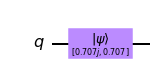

In [87]:
qc = qiskit.QuantumCircuit(1)  
qc.initial_state = [0,1] #initial_state as |1>
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

In [ ]:
sim = Aer.get_backend('aer_simulator')

In [ ]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
# Define initial_state as |1>
initial_state = [0,1] 
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0) 
# Tell simulator to save statevector
qc.save_statevector() 
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(qc)   
# Do the simulation and return the result
result = sim.run(qobj).result() 

In [ ]:
out_state = result.get_statevector()
print(out_state) 

The result above is a vector with the following complex elements (python uses j for imaginary units):<br>
0.+0j = 0 <br>
1.+0.j = 1

In [ ]:
qc.measure_all()
qc.draw(output='mpl')

Getting the counts for 0 and 1 results using .get_counts():

In [ ]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

The result shows that there is a 100% chance of measuring $|1\rangle = $ as expected.
<br>
The code below demonstrates the superposition of the Qubit using the state $|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $

In [ ]:
# Define state |q0>
initial_state = [1/sqrt(2), 1j/sqrt(2)]  

In [ ]:
# Redefine qc
qc = QuantumCircuit(1) 
qc.initialize(initial_state, 0) 

# Save statevector
qc.save_statevector() 
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() 
# Print the result
print(state)          

In [ ]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

The histogram shows an equal chance of measuring $|0\rangle$ or $|1\rangle$

To find the probability of measuring a state $|ψ\rangle$ in the state $|x\rangle$ the following formula can be used:
$p(|x\rangle) = | \langle x| ψ\rangle |^2$
<br>
$|x\rangle$ is the row vector. <br>
$| ψ\rangle$ is the column vector. <br>
converting between the bra-ket notation can be done using conjugate transpose. 
Using the formula above, the probability of measuring $|x\rangle$ can be calculated by taking the inner product of $|x\rangle$ and the state we are measuring in, $| ψ\rangle$ and then squaring the magnitude.
<br><br>

### <font color='salmon' >Measuring the probability of $|0\rangle$ : </font>
<br>
$|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $ <br><br>
$\langle0  |q_0\rangle = \frac{1}{\sqrt2} \langle 0|0\rangle + \frac{i}{\sqrt2}\langle0 |1\rangle $ <br><br>
= $\frac{1}{\sqrt2} .1 + \frac{i}{\sqrt2}. 0 $ <br><br>
= $\frac{1}{\sqrt2}$ <br><br>
= $|\langle0 |q_0\rangle |^2 = \frac{1}{2} $ <br><br>
The probability is 0.5 or $\frac{1}{2}$

### Initialisitng Qubit in state:
$|q_0\rangle = \frac{i}{\sqrt2} |0\rangle + \frac{1}{\sqrt2}|1\rangle $

In [82]:
import qiskit
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.visualization as viz
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [83]:
sim = Aer.get_backend('aer_simulator')

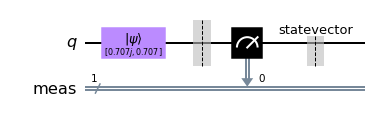

In [84]:
# Redefine qc
qc = qiskit.QuantumCircuit(1) 
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw(output='mpl')

In [85]:
# Simulate entire circuit.
# One amplitude is always 0.
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+1.j, 0.+0.j],
            dims=(2,))


## Representing the state of a Qubit with the Bloch Sphere

### state $|0\rangle$ :

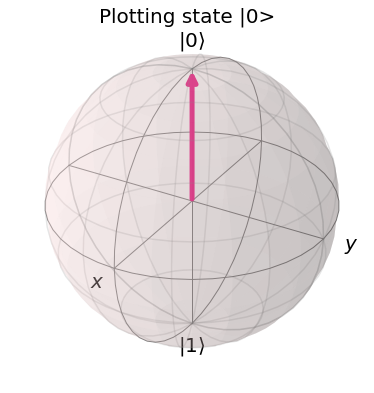

In [28]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1], title='Plotting state |0>')

****
# Qubit Gates

## Pauli Gates
### X-Gate
The X-gate is represented by Pauli-X matrix:
$X =  
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $ = $|0\rangle \langle 1 | + |1\rangle \langle0|$

<br>
<b>Multiply the Qubit statevector by the X-gate:</b><br>
<font color='SlateBlue'><i> The X-gate switches the amplitude of the states $|0\rangle$ and $|1\rangle$</i> </font> <br>
$X|0\rangle =  
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} 
\begin{bmatrix} 1 \\ 0 \end{bmatrix} = 
\begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$


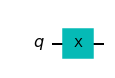

In [29]:
# Qiskit circuit to verify X-gate example above.
# X-gate on |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
#qc.measure(0,0)
qc.draw(output='mpl')

In [30]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

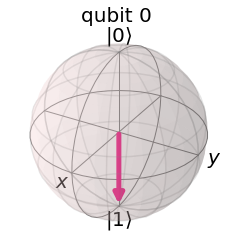

In [31]:
# Display result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

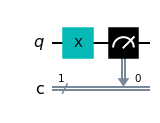

In [32]:
qc = qiskit.QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)

# Draw the circuit
qc.draw(output='mpl')

<font color='SlateBlue'><i> The state of the Qubit qc is $|1\rangle$</i> </font> <br>

### Y-gate
As with the X-gate, the Pauli Y matrix acts as the Y-gate:
$Y =  
\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} $ <br>
<br>
$Y = -i|0\rangle \langle 1 | + i |1\rangle \langle0|$

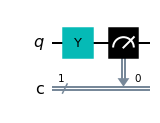

In [33]:
# Create a circuit.
qc = qiskit.QuantumCircuit(1, 1)

# Add a gate.
qc.y(0)

# Measure.
qc.measure(0, 0)

# Draw the circuit
qc.draw(output='mpl')

### Z-gate
As with the X-gate, the Pauli Z matrix acts as the Z-gate:
$Z =  
\begin{bmatrix} 1 & 0 \\ 0 &-1 \end{bmatrix} $
<br>
<br>
$Z =|0\rangle \langle 0 | - |1\rangle \langle1|$

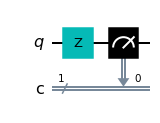

In [34]:
# Create a circuit.
qc = qiskit.QuantumCircuit(1, 1)

# Add a gate.
qc.z(0)

# Measure.
qc.measure(0, 0)

# Draw the circuit
qc.draw(output='mpl')

In [35]:
qc.y(0) # Y-gate on qubit 0
qc.z(0) # Z-gate on qubit 0
qc.draw()

┌───┐┌─┐┌───┐┌───┐
  q: ┤ Z ├┤M├┤ Y ├┤ Z ├
     └───┘└╥┘└───┘└───┘
c: 1/══════╩═══════════
           0

### H-gate (Hadamard Gate)
The H-gate is a basic quantum gate.Using the H-gate means a superposition of $|0\rangle$ and $|1\rangle$ can be created.
<br>
Matrix of H-gate: <br>
$H = \frac{1}{\sqrt2} 
\begin{bmatrix} 1 & 1 \\ 1 &-1 \end{bmatrix} $
<br>
<br>
This matrix performs two tranformations:<br>
<font color="purple">
$H|0\rangle = |+\rangle$ <br> $H|1\rangle = |-\rangle$
    </font>
    <br>
    <br>
The H-gate looks like this on the bloch vector:
<br>
<i> it transforms the state of the Qubit between X and Z bases.<i>

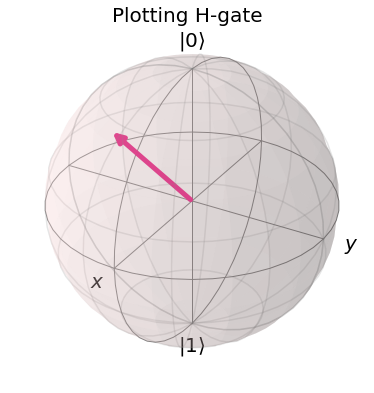

In [36]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,1], title='Plotting H-gate')

### T-Gate
The T-gate is a P-gate with $ϕ=π/4:$ <br>
Matrix of T-gate: <br>
$T = 
\begin{bmatrix} 1 & 0 \\ 0 & e ^\frac{iπ}{4} \end{bmatrix} $
<br>
<br>
$T† = 
\begin{bmatrix} 1 & 0 \\ 0 & e ^{-\frac{iπ}{4}} \end{bmatrix} $

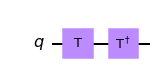

In [37]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw(output='mpl')

#### Exercise:
Re-run the above simulations with the qubit set initially to $|1\rangle$.

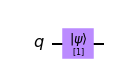

In [38]:
# X-gate
circuit = QuantumCircuit(1)
circuit.initialize(1)
circuit.draw(output='mpl')

In [39]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
 # Define initial_state as |1>
initial_state = [0,1]
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0)
# Tell simulator to save statevector
qc.save_statevector() 
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(qc) 
 # Do the simulation and return the result
result = sim.run(qobj).result()

In [40]:
out_state = result.get_statevector()
print(out_state) # output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


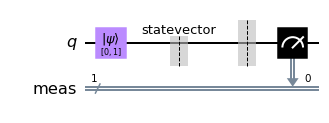

In [41]:
qc.measure_all()
qc.draw(output='mpl')

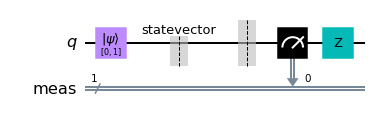

In [42]:
qc.z(0)
qc.draw(output='mpl')

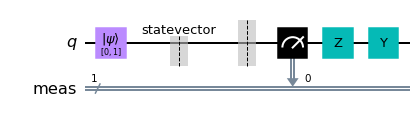

In [43]:
qc.y(0)
qc.draw(output='mpl')

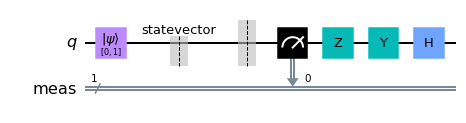

In [44]:
qc.h(0)
qc.draw(output='mpl')

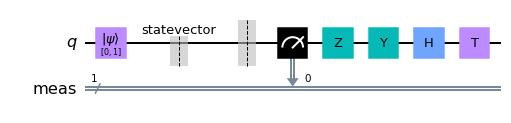

In [45]:
qc.t(0)
qc.draw(output='mpl')

In [46]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)
 # Define initial_state as |0>
initial_state = [1,0]
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0)
# Tell simulator to save statevector
qc.save_statevector() 
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(qc) 
 # Do the simulation and return the result
result = sim.run(qobj).result()

In [47]:
out_state = result.get_statevector()
print(out_state) # output state vector

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


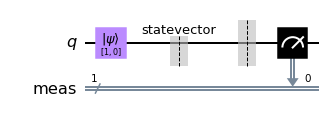

In [48]:
qc.measure_all()
qc.draw(output='mpl')

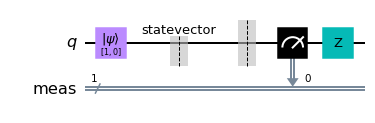

In [49]:
qc.z(0)
qc.draw(output='mpl')

***
## Quantum Gates
***

In [50]:
import qiskit
# Qiskit Visualisation.
#import qiskit.visualization as viz
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [51]:
# Qiskit version.
qiskit.__qiskit_version__ 

{'qiskit-terra': '0.22.3', 'qiskit-aer': '0.11.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [52]:
# Creating a circuit with 8 Qubits & 8 outputs.
qc_output = QuantumCircuit(8)
qc_output.draw(initial_state=True)

q_0: |0>
        
q_1: |0>
        
q_2: |0>
        
q_3: |0>
        
q_4: |0>
        
q_5: |0>
        
q_6: |0>
        
q_7: |0>

In [53]:
# Adds a measurement to each qubit in the circuit qc_output.
qc_output.measure_all()

In [54]:
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

<font color= "orange" > <h6> Qubits are initialized to give an output of 0, like in the circuit above. <br>
To visualise this, the circuit has been run many times and the results plotted in a histogram are shown below. </font> </h6>

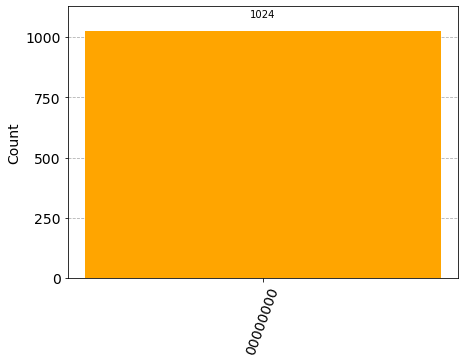

In [55]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts, color="orange")

## NOT Gate
A NOT gate flips the bit values so 0 = 1 and 1 = 0.
- x represents the operation that does NOT calculation.

In [56]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [57]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

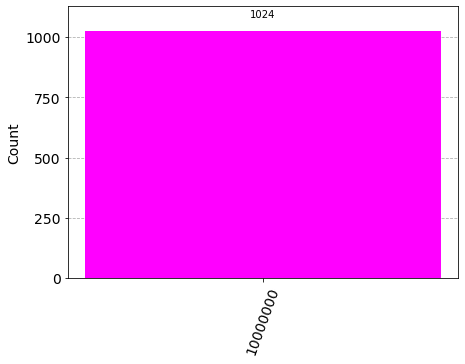

In [58]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts, color="fuchsia")

<font color="fuchsia"> <h6> Note how in the histogram above, the output is 10000000, instead of all 0s. </h6> </font>

In [59]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(1)

qc_encode.draw()

q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
q_2: ──────────
               
q_3: ──────────
               
q_4: ──────────
               
q_5: ──────────
               
q_6: ──────────
               
q_7: ──────────

In [60]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ───────────░─┤M├─────────────────────
        ┌───┐┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ X ├┤ X ├─░──╫─┤M├──────────────────
        └───┘└───┘ ░  ║ └╥┘┌─┐               
   q_2: ───────────░──╫──╫─┤M├───────────────
                   ░  ║  ║ └╥┘┌─┐            
   q_3: ───────────░──╫──╫──╫─┤M├────────────
                   ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ───────────░──╫──╫──╫──╫─┤M├─────────
                   ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ───────────░──╫──╫──╫──╫──╫─┤M├──────
                   ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ───────────░──╫──╫──╫──╫──╫──╫─┤M├───
                   ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ───────────░──╫──╫──╫──╫──╫──╫──╫─┤M├
                   ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/══════════════╩══╩══╩══╩══╩══╩══╩══╩═
                      0  1  2  3  4  5  6  7

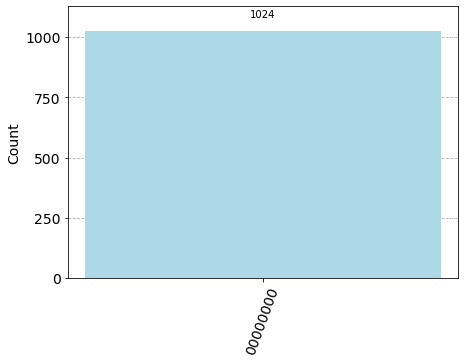

In [61]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts, color="lightblue")

## CNOT Gate
The CNOT gate behaves in the same way as a XOR gate. It determines if two Qubits are different.

| Input1 | Input2 | XOR Output |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

<c>Possible CNOT inputs & the corresponding outputs.</c>

| Input(q1q0) | Output(q1q0) |
| --- | --- |
| 00 | 00 |
| 01 | 11 |
| 10 | 10 |
| 11 | 01 |

In [62]:
# Draw a CNOT gate;
# small black square is the control qubit.
# larger white sqaure is the target qubit.
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [63]:
# Testing different CNOT inputs: (0,1) (1,0)
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [64]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(1,0)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐┌───┐┌─┐   
q_0: ┤ X ├┤ X ├┤M├───
     └───┘└─┬─┘└╥┘┌─┐
q_1: ───────■───╫─┤M├
                ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

The CNOT sees that qubit 0 is in state 1, and so applies a NOT to qubit 1. This flips the 0 of qubit 1 into a 1, and so turns 01 into 11.

In [65]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

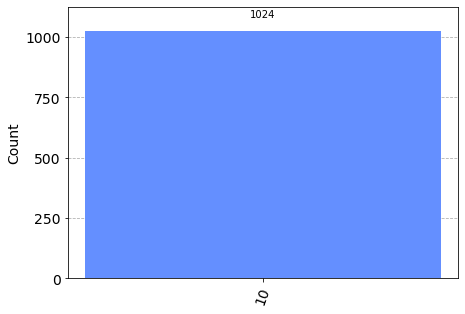

In [66]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Result on histogram is 10. This means the computer can solve the 1 + 1 problem.

****
# <font color="LightGreen">Deutsch-Jozsa Problem</font>
The Deutsch-Jozsa Algorithm was proposed in 1992 by <font color="DarkGreen"><b> David Deutsch</b> </font> and <font color="DarkGreen"> <b>Richard Jozsa</b></font>. It is a deterministic quantum algorithm that has a better performance than the best classical algorithm. It was the first algorithm to separate quantum and classical difficulty of a problem. It highlights the significance of using quantum amplitudes that take positive and negative values, opposed to using classical probabilities that are always non-negative.

### <font color="DarkGreen" > The Problem Explained </font>
<br>
A Boolean function guarantees to be balanced or constant. <br>
- Constant functions return all 0's or all 1's. <br>
- Balanced functions return 0 for half of all inputs and 1 for the other half of inputs.
<br><br><br>
The Boolean function $f$ takes a String of bits as input and returns either $0$ or $1$.
<br>
<font color="YellowGreen"> $f({x_0,x_1,x_2,...}) -> $ 0 or 1, where $x_n$ is 0 or 1 </font>
<br><br>
Task: To determine whether the given Boolean function is balanced or constant.


## <font color="DarkGreen" > The Classical Solution </font>
<br>
<b>BEST CASE:</b>
Two queries to the oracle determine if the Boolean fuction $f(x)$ is balanced as two different outputs will be obtained: <br>
$f(0,0,0...) -> 0$ and $f(1,0,0,...) -> 1$ <br>
<br>
<b>WORST CASE:</b>
To conclude that $f(x)$ is constant, half + 1 of all possible inputs need to be checked, if the inputs continuously result in the same output.
<br>
The total number of inputs is $2^n$ so $2^{n-1} + 1$ inputs are checked to confirm that $f(x)$ is constant. <br>


## <font color="DarkGreen" > The Quantum Solution </font>
<br>
The problem can be solved with one call to the function $f(x)$ using a quantum computer. 
<br>
This works by implementing $f(x)$ as a quantum oracle that maps the state $|x\rangle|y\rangle$ to $|x\rangle |y⊕f(x)\rangle$, where ⊕ is addition modulo 2.


In [90]:
def f1(x):
    if x == 0:
        return 0
    else:
        return 0

In [91]:
def f2(x):
    if x == 0:
        return 0
    else:
        return 1

In [92]:
def f3(x):
    if x == 0:
        return 1
    else:
        return 0

In [93]:
def f4(x):
    if x == 0:
        return 1
    else:
        return 1

In [94]:
L = [f1, f2, f3, f4]

In [95]:
f = random.choice(L)

In [96]:
f(0)

0

In [97]:
f(1)

1

In [98]:
f

<function __main__.f2(x)>

In [99]:
list(itertools.product([0,1], repeat=3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [100]:
list(itertools.product([0,1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [101]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=2))
    L = random.choice(possible_Ls)
    def f(x):
        return L[x]
    return f

In [102]:
f = random_f()

In [103]:
f(0)

1

In [104]:
f(1)

1

## <font color="DarkGreen" > Stepping Through the Quantum Algorithm </font>
<br>
<font color="Olive"> 1. Two quantum registers are required; an n-qubit initialised to $|0\rangle$ and a 1-qubit initialised to $|1\rangle$. </font>
<br><br>

<font color="Olive"> 2. The Hadamard gate must then be applied to each qubit because for each $x$ , $f(x)$ is 0 or 1.
<br> </font>
$|ψ_1\rangle = \frac{1}{\sqrt2{^n+1}} \sum\limits_{x=0}^{2^{n-1}} |x\rangle (|0\rangle - |1\rangle)$
<br><br>

<font color="Olive">3. Apply the quantum oracle $|x\rangle|y\rangle$ to $|x\rangle |y⊕f(x)\rangle$
<br> </font>
$|ψ_2\rangle = \frac{1}{\sqrt2{^n+1}} \sum\limits_{x=0}^{2^{n-1}} |x\rangle (|f(x)\rangle - |1 ⊕ f(x)\rangle)$
<br><br>
$=\frac{1}{\sqrt2{^n+1}} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)} |x\rangle (|0\rangle - |1\rangle)$

<br>
<br>

<font color="Olive">4. Apply Hadamard gate to qubit in first register.<br>
Where $x . y =x_0y_0 ⊕ x_1y_1 ⊕ ... ⊕ x_{n-1}y_{n-1}$ is the sum of the bitwise product. <br></font>

$|ψ_3\rangle= \frac{1}{2{^n}} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)} \begin{bmatrix} \sum\limits_{x=0}^{2^{n-1}}(-1)^{x.y}|y\rangle \end{bmatrix}$
<br>
<br>

$\frac{1}{2{^n}} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)} \begin{bmatrix} \sum\limits_{y=0}^{2^{n-1}}(-1)^{f(x)}(-1)^{x.y}\end{bmatrix}|y\rangle $
<br><br>

<font color="Olive">5. The first register needs to be measured. <br> </font>
The probability of measuring $|0\rangle ^{⊕n} = |\frac{1}{2^n} \sum\limits_{x=0}^{2^{n-1}}(-1)^{f(x)}|^2$ evaluates to 1 if $f(x)$ is constant and 0 if $f(x)$ is balanced.

https://quantum-computing.ibm.com/composer/docs/iqx/guide/deutsch-jozsa-algorithm
https://freecontent.manning.com/all-about-hadamard-gates/
https://qiskit.org/
https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/05-quantum-computing.ipynb
https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html